In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.api as sm

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


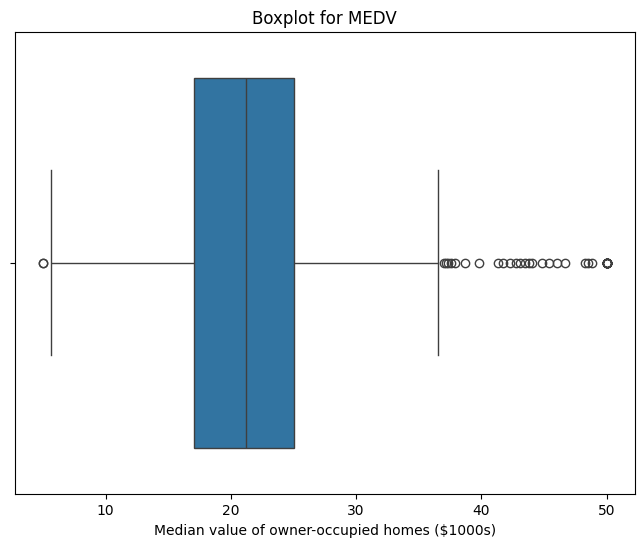

In [8]:
# Boxplot for the "Median value of owner-occupied homes" (MEDV) variable:
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.xlabel('Median value of owner-occupied homes ($1000s)')
plt.title('Boxplot for MEDV')
plt.show()

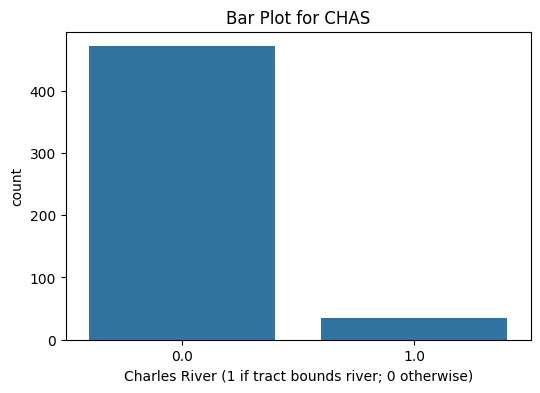

In [9]:
#Bar plot for the Charles River variable (CHAS):
plt.figure(figsize=(6, 4))
sns.countplot(x=boston_df['CHAS'])
plt.xlabel('Charles River (1 if tract bounds river; 0 otherwise)')
plt.title('Bar Plot for CHAS')
plt.show()


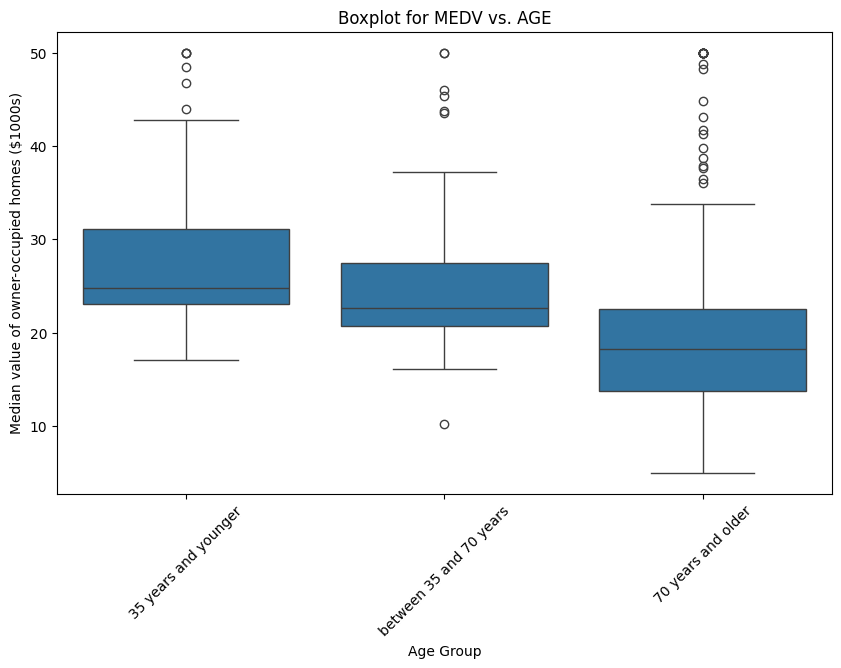

In [10]:
#Boxplot for MEDV vs. AGE:
# Discretize AGE variable into three groups
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.xlabel('Age Group')
plt.ylabel('Median value of owner-occupied homes ($1000s)')
plt.title('Boxplot for MEDV vs. AGE')
plt.xticks(rotation=45)
plt.show()

# Don't forget to drop the AGE_Group column if you don't need it for further analysis
boston_df.drop(columns='AGE_Group', inplace=True)


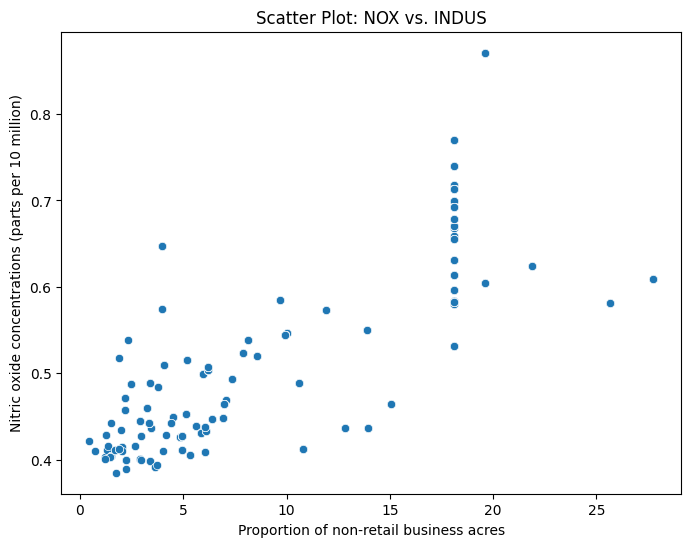

In [11]:
#Scatter plot for Nitric oxide concentrations (NOX) vs. proportion of non-retail business acres (INDUS):
plt.figure(figsize=(8, 6))
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])
plt.xlabel('Proportion of non-retail business acres')
plt.ylabel('Nitric oxide concentrations (parts per 10 million)')
plt.title('Scatter Plot: NOX vs. INDUS')
plt.show()


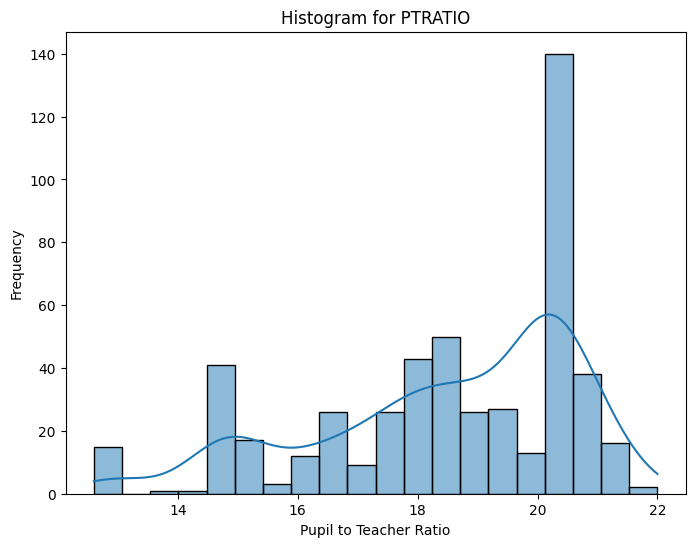

In [12]:
#Histogram for the pupil to teacher ratio variable (PTRATIO):
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.title('Histogram for PTRATIO')
plt.show()


# Question 1: 
Is there a significant difference in the median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0 (Null Hypothesis): There is no significant difference in the median value of houses between those bounded by the Charles river (CHAS = 1) and those not bounded by the Charles river (CHAS = 0).
H1 (Alternative Hypothesis): There is a significant difference in the median value of houses between the two groups.
Test Statistics: We'll perform an independent samples t-test.

In [16]:
# Split data into two groups
river_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_river_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_statistic, p_value = ttest_ind(river_bounded, not_river_bounded)

# Check if p-value is less than alpha
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject H0"
else:
    conclusion = "Fail to reject H0"

print(f'Test Statistic: {t_statistic}')
print(f'P-value: {p_value}')
print(f'Conclusion: {conclusion}')


Test Statistic: 3.996437466090509
P-value: 7.390623170519902e-05
Conclusion: Reject H0


Conclusion: Based on the t-test, we reject the null hypothesis. There is a significant difference in the median value of houses between those bounded by the Charles river and those not bounded by the Charles river.

# Question 2: 
Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)

H0 (Null Hypothesis): There is no significant difference in the median values of houses (MEDV) among different age groups.

H1 (Alternative Hypothesis): There is a significant difference in the median values of houses (MEDV) among different age groups.

Test Statistics: We'll perform an analysis of variance (ANOVA).

In [20]:
# Define the age groups
def age_group(age):
    if age <= 35:
        return '35 years and younger'
    elif age <= 70:
        return 'between 35 and 70 years'
    else:
        return '70 years and older'

# Apply the age_group function to create the 'AGE_Group' column
boston_df['AGE_Group'] = boston_df['AGE'].apply(age_group)


In [21]:
# Perform ANOVA
result = f_oneway(
    boston_df[boston_df['AGE_Group'] == '35 years and younger']['MEDV'],
    boston_df[boston_df['AGE_Group'] == 'between 35 and 70 years']['MEDV'],
    boston_df[boston_df['AGE_Group'] == '70 years and older']['MEDV']
)

# Check if p-value is less than alpha
alpha = 0.05
if result.pvalue < alpha:
    conclusion = "Reject H0"
else:
    conclusion = "Fail to reject H0"

print(f'F-statistic: {result.statistic}')
print(f'P-value: {result.pvalue}')
print(f'Conclusion: {conclusion}')


F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Conclusion: Reject H0


Conclusion: Based on ANOVA, we reject the null hypothesis. There is a significant difference in the median values of houses (MEDV) among different age groups.

# Question 3: 
Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)

H0 (Null Hypothesis): There is no significant correlation between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

H1 (Alternative Hypothesis): There is a significant correlation between NOX and INDUS.

Test Statistics: We'll perform a Pearson correlation test.


In [22]:
# Perform Pearson correlation
corr_coeff, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Check if p-value is greater than alpha
alpha = 0.05
if p_value > alpha:
    conclusion = "Fail to reject H0"
else:
    conclusion = "Reject H0"

print(f'Correlation Coefficient: {corr_coeff}')
print(f'P-value: {p_value}')
print(f'Conclusion: {conclusion}')


Correlation Coefficient: 0.7636514469209157
P-value: 7.913361061236247e-98
Conclusion: Reject H0


Conclusion: The Pearson correlation analysis reveals a strong positive correlation (correlation coefficient ≈ 0.764) between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). With a p-value much smaller than 0.05, we confidently reject the null hypothesis, indicating a significant positive relationship between these variables.

# Question 4: 
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? (Regression analysis)

H0 (Null Hypothesis): An additional weighted distance to the five Boston employment centers has no impact on the median value of owner-occupied homes (MEDV).

H1 (Alternative Hypothesis): An additional weighted distance to the five Boston employment centers has an impact on MEDV.

Test Statistics: We'll perform a multiple linear regression analysis to assess the impact.



In [23]:
# Add a constant term to the predictor variable
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get summary statistics
summary = model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        10:36:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Conclusion: The linear regression analysis indicates that an additional weighted distance to the five Boston employment centers (DIS) has a statistically significant impact on the median value of owner-occupied homes (MEDV). The coefficient for DIS is approximately 1.092, suggesting that for each unit increase in DIS, the median home value increases by about $1,092. The model's R-squared value of 0.062 indicates that approximately 6.2% of the variability in MEDV can be explained by DIS, suggesting that while statistically significant, the practical significance may be limited.





